# Programming For Data Science - Final Project

## Group members:

| Name              | ID       |
|-------------------|----------|
| Pham Dang Son Ha |21127206|
| Nguyen Cao Khoi   | 21127632 |

## Table of Contents

1. [Collecting Data](#collecting-data)

2. [Exploring And Preprocessing Data](#exploring-and-preprocessing-data)

3. [Asking Meaningful Questions And Analyzing](#asking-meaningful-questions-and-analyzing)

4. [Reflection](#reflection)
5. [References](#references)

## 1. Collecting Data

### _1.1. Subject And Source_

-  Subject: The [Online Retails Sale Dataset](https://www.kaggle.com/datasets/rohitmahulkar/online-retails-sale-dataset/data?fbclid=IwAR073q0CYe_aoD5bjPNrycjMGsDoXCxytfm8p7WpWJTBH9XkqrOCrbV_LRU) contains transactions from 12/01/2010 to 12/09/2011 of an online retail company based in the UK. It includes 10 attributes, and the number of rows in the dataset is 541,909 rows.

- Source: The author got this data from [Tata Data Visualisation: Empowering Business with Effective Insights](https://www.theforage.com/simulations/tata/data-visualisation-p5xo), which is a virtual internship program offered by Tata Insights and Quants (Tata iQ) on the Forage platform.

### _1.2. Authors And Copyright_

- Author: [Rohit Mahulkar](https://www.kaggle.com/rohitmahulkar) (Owner)

- Copyright: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) - This means others can freely use, modify, and build upon these works for any purpose without any restrictions.

### _1.3. The way authors collect data_

- The author did not directly collect the data but was provided during his or her virtual internship program. In the program, participants are given a dataset and are tasked with cleaning, transforming, and analyzing the data to provide valuable insights

- The data collection methodology is not explicitly mentioned in the program. However, given that the dataset is about an online retail company, it’s likely that the data was collected from the company’s transaction records or customer database.

## 2. Exploring And Preprocessing Data

### _2.1. Import libraries_

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

### _2.2. Loading the data_

In [3]:
df = pd.read_csv('Online Retail.csv')

# Print 5 samples
df.sample(5)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
112240,545890,07-03-2011,04:39:00 PM,22327,ROUND SNACK BOXES SET OF 4 SKULLS,6,2.95,17.70,16782.0,United Kingdom
370259,569133,30-09-2011,02:06:00 PM,47504K,ENGLISH ROSE GARDEN SECATEURS,12,0.79,9.48,15185.0,United Kingdom
391282,570666,11-10-2011,02:24:00 PM,22704,WRAP RED APPLES,25,0.42,10.50,13919.0,Denmark
258685,559668,11-07-2011,01:40:00 PM,22993,SET OF 4 PANTRY JELLY MOULDS,12,1.25,15.00,13394.0,United Kingdom
241982,558263,28-06-2011,08:50:00 AM,23019,SMALL APOTHECARY MEASURING JAR,12,7.45,89.40,14646.0,Netherlands


### _2.3. How many rows and columns ?_

In [6]:
# How many rows and how many columns?
rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns.')

# Are there duplicated rows?
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicated rows.')

# What is the current data type of each column? Are there columns having inappropriate data types?
print(df.dtypes)
print('Check the above output to see the data type of each column.')

There are 541909 rows and 10 columns.
There are 5268 duplicated rows.
InvoiceNo       object
InvoiceDate     object
InvoiceTime     object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
Totalsale      float64
CustomerID     float64
Country         object
dtype: object
Check the above output to see the data type of each column.


- The meaning of each row: a transactions of an online retail company based in the UK. 

- The meaning of each column: 
    + InvoiceNo: Transactions ID for successfull orders
    + InvoiceDate: Date in which the orders place
    + InvoiceTime: Time stamp in which the orders place relevant to geoghraphical location
    + StockCode: Products ID
    + Description: Name of product (contain some missing names of products which are return, damaged, lost etc...)
    + Quantity: The quantity of products sold (contain negative number of quantity which are return,damageded, lost etc...)
    + UnitPrice: Selling price of a single unit of product
    + Totalsale: Total of selling price
    + CustomerID: Customer Id
    + Country: Country Name

In [8]:
# Convert InvoiceNo to string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Convert InvoiceDate and InvoiceTime to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y')
df['InvoiceTime'] = pd.to_datetime(df['InvoiceTime']).dt.time

# Convert StockCode to string
df['StockCode'] = df['StockCode'].astype(str)

# Convert Description to string
df['Description'] = df['Description'].astype(str)

# Quantity is already an integer, so no conversion is needed

# UnitPrice, Totalsale, and CustomerID are already in appropriate formats

# Convert Country to string
df['Country'] = df['Country'].astype(str)

# Check the data types after conversion
print(df.dtypes)

C:\Users\PhamDangSonHa\AppData\Local\Temp\ipykernel_20312\2281663275.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceTime'] = pd.to_datetime(df['InvoiceTime']).dt.time


InvoiceNo              object
InvoiceDate    datetime64[ns]
InvoiceTime            object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Totalsale             float64
CustomerID            float64
Country                object
dtype: object


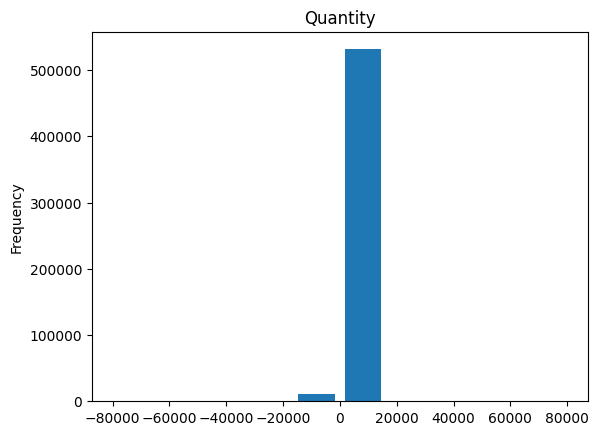

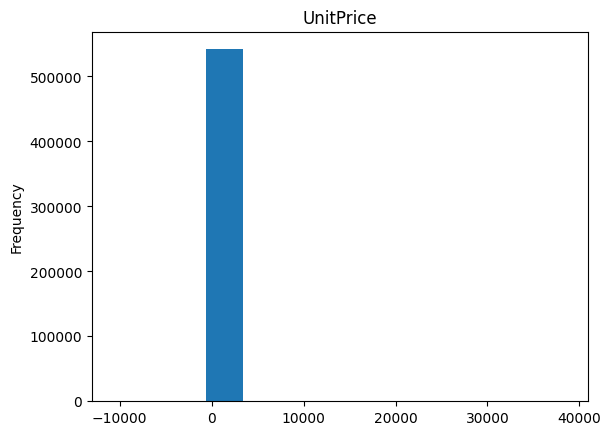

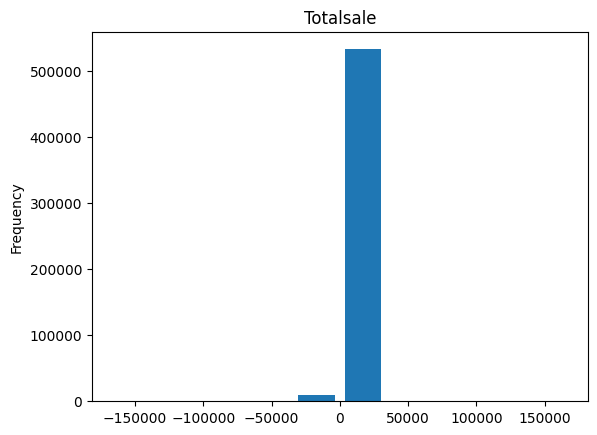

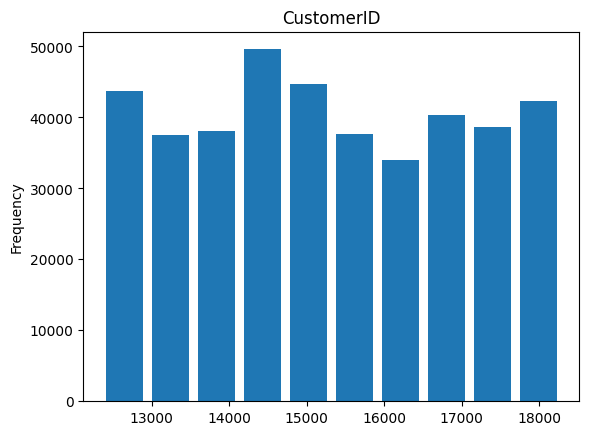

Percentage of missing values:
InvoiceNo       0.000000
InvoiceDate     0.000000
InvoiceTime     0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
UnitPrice       0.000000
Totalsale       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64
Min values:
InvoiceNo                              536365
InvoiceDate               2010-12-01 00:00:00
InvoiceTime                          06:10:00
StockCode                               10002
Description     4 PURPLE FLOCK DINNER CANDLES
Quantity                               -80995
UnitPrice                           -11062.06
Totalsale                           -168469.6
CustomerID                            12346.0
Country                             Australia
dtype: object
Max values:
InvoiceNo                  C581569
InvoiceDate    2011-12-09 00:00:00
InvoiceTime               20:38:00
StockCode                        m
Description      wrongly sold sets
Quantity                     809

In [10]:
# For each numerical column, plot a histogram to see how values are distributed
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure()
    df[col].plot(kind='hist', rwidth=0.8)
    plt.title(col)
plt.show()

# Calculate the percentage of missing values
missing_values = df.isnull().sum() / len(df) * 100
print(f'Percentage of missing values:\n{missing_values}')

# Calculate min and max values
min_values = df.min()
max_values = df.max()
print(f'Min values:\n{min_values}\nMax values:\n{max_values}')

In [11]:
# For each categorical column, print the value counts to see how values are distributed
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f'\nColumn: {col}')
    print(df[col].value_counts())

# Print the number of unique values and a few examples for each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f'\nColumn: {col}')
    print(f'Number of unique values: {len(unique_values)}')
    print(f'Some unique values: {unique_values[:5]}')


Column: InvoiceNo
InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

Column: InvoiceTime
InvoiceTime
15:56:00    2628
14:41:00    2554
15:17:00    2376
16:14:00    2372
14:09:00    2172
            ... 
06:14:00       1
06:13:00       1
06:12:00       1
20:32:00       1
06:21:00       1
Name: count, Length: 774, dtype: int64

Column: StockCode
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

Column: Description
Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
        

## 3. Asking Meaningful Questions And Analyzing

## 4. Reflection

## 5. References